# EDA covid cases

In [3]:
import sys
sys.path.insert(1, '/Users/jakoliendenhollander/capstone/capstone')

import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import functions.functions_data
import functions.functions_corona_stats
import functions.functions_HDI
import functions.functions_mask_wearing

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None) # To display all columns

sns.set_style("whitegrid")
mono_palette = ["steelblue"]
heatmap_palette = sns.diverging_palette(240, 10, n=9)
gender_palette = ["indianred", "steelblue"]

### Read in data

In [5]:
covid_cases = pd.read_csv("/Users/jakoliendenhollander/capstone/capstone/data/Corona_stats/owid-covid-data.csv")

In [6]:
# Reading in survey data from csv into a dictionary of dataframes.
dfs_country = functions.functions_data.get_data("/Users/jakoliendenhollander/capstone/capstone/data/CMU_Global_data/Full_Survey_Data/country/smooth/", "country")

# Concatenating individuals dataframes from the dictionary into one dataframe for regions.
survey_data = pd.concat(dfs_country, ignore_index=True)

Read in data completed.


In [7]:
# Merging survey data and covid cases
df_merged = functions.functions_corona_stats.merge_corona_stats(survey_data,covid_cases)

Merging corona stats completed.


In [8]:
# Getting the dictionaries for the hdi and the hdi-levels.
dict_hdi, dict_hdi_levels = functions.functions_HDI.get_hdi("/Users/jakoliendenhollander/capstone/capstone/data","hdro_statistical_data_tables_1_15_d1_d5.xlsx")

# Creating a new column with the hdi and the hdi-levels in the regions dataframe
df_merged_hdi = functions.functions_HDI.create_hdi_columns(df_merged, dict_hdi, dict_hdi_levels)

Creating dictionaries for hdi and hdi-levels completed.
Creating hdi list completed.
Creating hdi-level list completed.


### Data cleaning

In [9]:
# Change object into datetime object and create month column
df_month = functions.functions_data.insert_month(df_merged_hdi)

# Deal with NaN's in the wearing mask all the time column
df_complete = functions.functions_mask_wearing.deal_with_NaNs_masks(df_month)

# Delete 'other' and 'overall' in gender column and 'overall' in age bucket
df = functions.functions_mask_wearing.delete_overall(df_complete)

Created month column.
NaNs before update: 163383
NaNs after update: 0
Updated.
Deleted other and overall.


In [10]:
# Make a dataframe for the corona stats data.
df_stats = df[["total_cases_per_million","new_cases_smoothed_per_million",
               "total_deaths_per_million","new_deaths_smoothed_per_million",
              "median_age","aged_65_older"]]
df_stats.describe()

,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,median_age,aged_65_older
count,105770.000000,105776.000000,104183.000000,105776.000000,106188.000000,105051.000000
mean,3952.972964,50.258851,127.124429,0.952522,33.875374,10.949232
std,5780.197485,94.273980,193.648333,1.840408,8.381765,6.488721
min,0.034000,0.000000,0.026000,0.000000,16.400000,1.144000
25%,326.763000,3.327000,7.025000,0.050000,27.600000,5.319000
50%,1775.030000,16.112000,43.302000,0.259000,33.500000,8.552000
75%,5189.217000,59.441500,144.953500,1.092000,41.800000,16.821000
max,46213.199000,1393.822000,1069.406000,33.700000,48.200000,27.049000


The number of new cases and the number of new deaths is below zero, so every row below 0 is excluded.

In [11]:
df1=df[df["new_cases_smoothed_per_million"] >= 0]
df2=df1[df1["new_deaths_smoothed_per_million"] >= 0]

### Plotting

#### COVID-like-illness
As the number of COVID cases and deaths goes up, the number of individuals with COVID-like-illness decreases, which does not make sense. So, COVID-like-illness may not be a helpful variable.

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(14,7))
sns.set_palette(mono_palette)

sns.scatterplot(x="smoothed_pct_cli_weighted", y="total_cases_per_million", data=df2, ax=axes[0][0]);
sns.scatterplot(ax=axes[0][0]).set_title('Total cases');
sns.scatterplot(x="smoothed_pct_cli_weighted", y="new_cases_smoothed_per_million", data=df2, ax=axes[0][1]);
sns.scatterplot(ax=axes[0][1]).set_title('New cases');
sns.scatterplot(x="smoothed_pct_cli_weighted", y="total_deaths_per_million", data=df2, ax=axes[1][0]);
sns.scatterplot(ax=axes[1][0]).set_title('Total deaths');
sns.scatterplot(x="smoothed_pct_cli_weighted", y="new_deaths_smoothed_per_million", data=df2, ax=axes[1][1]);
sns.scatterplot(ax=axes[1][1]).set_title('New deaths');

plt.tight_layout()

#### Wear mask all the time

As the number of COVID cases and deaths increase, the number of people wearing masks increases.

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(14,7))
sns.set_palette(mono_palette)

sns.scatterplot(x="smoothed_pct_wear_mask_all_time_weighted", y="total_cases_per_million", data=df2, ax=axes[0][0]);
sns.scatterplot(ax=axes[0][0]).set_title('Total cases');
sns.scatterplot(x="smoothed_pct_wear_mask_all_time_weighted", y="new_cases_smoothed_per_million", data=df2, ax=axes[0][1]);
sns.scatterplot(ax=axes[0][1]).set_title('New cases');
sns.scatterplot(x="smoothed_pct_wear_mask_all_time_weighted", y="total_deaths_per_million", data=df2, ax=axes[1][0]);
sns.scatterplot(ax=axes[1][0]).set_title('Total deaths');
sns.scatterplot(x="smoothed_pct_wear_mask_all_time_weighted", y="new_deaths_smoothed_per_million", data=df2, ax=axes[1][1]);
sns.scatterplot(ax=axes[1][1]).set_title('New deaths');

plt.tight_layout()

#### Social distancing attended public event

As the number of COVID cases and deaths increase, the number of people attending a public event decreases.

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(14,7))
sns.set_palette(mono_palette)

sns.scatterplot(x="smoothed_pct_attended_public_event_weighted", y="total_cases_per_million", data=df2, ax=axes[0][0]);
sns.scatterplot(ax=axes[0][0]).set_title('Total cases');
sns.scatterplot(x="smoothed_pct_attended_public_event_weighted", y="new_cases_smoothed_per_million", data=df2, ax=axes[0][1]);
sns.scatterplot(ax=axes[0][1]).set_title('New cases');
sns.scatterplot(x="smoothed_pct_attended_public_event_weighted", y="total_deaths_per_million", data=df2, ax=axes[1][0]);
sns.scatterplot(ax=axes[1][0]).set_title('Total deaths');
sns.scatterplot(x="smoothed_pct_attended_public_event_weighted", y="new_deaths_smoothed_per_million", data=df2, ax=axes[1][1]);
sns.scatterplot(ax=axes[1][1]).set_title('New deaths');

plt.tight_layout()

### Plots for the presentation

In [12]:
# Plotting settings
plt.style.use('seaborn-talk')
slides_palette = ["#00287f", "#00c5ff"]
sns.set_palette(slides_palette)
order1 = ["Germany", "Netherlands"]
order2 = ["Germany", "Czech Republic"]

#### Mask wearing

In [18]:
# Create a data frame with Netherlands and Germany
df_nl_deu = df2[df2['country_agg'].str.contains('|'.join(['Netherlands','Germany']))]
df_nl_deu["smoothed_pct_wear_mask_all_time_weighted"] = df_nl_deu["smoothed_pct_wear_mask_all_time_weighted"]/100

In [ ]:
# Plot total cases per million and wearing a mask all the time
f, axes = plt.subplots(1, 2, figsize=(15,5))

g1 = sns.lineplot(data=df_nl_deu, x="date", y="total_cases_per_million", hue="country_agg", ax=axes[0], hue_order=order1);
g1.set_title('COVID-19 total cases per million');
g1.set_xlabel('date');
g1.set_ylabel('total cases per million');
g1.set_ylim(ymin=0,ymax=35000);
g1.legend().set_title('')
g1.legend(loc='upper left')

g2 = sns.lineplot(data=df_nl_deu, x="date", y="smoothed_pct_wear_mask_all_time_weighted", hue="country_agg", legend=False, ax=axes[1], hue_order=order1);
g2.set_title('Wearing a mask all the time');
g2.set_xlabel('date');
g2.set_ylabel('percentile wearing a mask all the time');
g2.set_ylim(ymin=0,ymax=1);

#### Social distancing

In [19]:
# Create a data fram with Czech Republic and Germany
df_cze_deu = df2[df2['country_agg'].str.contains('|'.join(['Czech Republic','Germany']))]
df_cze_deu["smoothed_pct_attended_public_event_weighted"] = df_cze_deu["smoothed_pct_attended_public_event_weighted"]/100

In [ ]:
# Plot total cases per million and attending public events
f, axes = plt.subplots(1, 2, figsize=(15,5))

g1 = sns.lineplot(data=df_cze_deu, x="date", y="total_cases_per_million", hue="country_agg", ax=axes[0], hue_order=order2);
g1.set_title('COVID-19 total cases per million');
g1.set_ylabel('total cases per million');
g1.set_ylim(ymin=0,ymax=35000);
g1.legend().set_title('')
g1.legend(loc='upper left')

g2 = sns.lineplot(data=df_cze_deu, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", legend=False, ax=axes[1], hue_order=order2);
g2.set_title('Attending public events');
g2.set_ylabel('percentile attending public events');
g2.set_ylim(ymin=0,ymax=1);

### Combined_plot

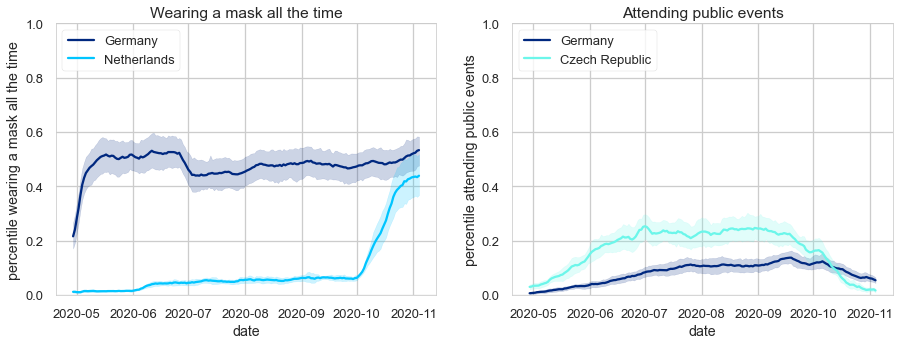

In [24]:
# Plotting settings
plt.style.use('seaborn-talk')
slides_palette_DEU_NLD = ["#00287f", "#00c5ff"]
slides_palette_DEU_CZE = ["#00287f", "#6cf6ea"]
order1 = ["Germany", "Netherlands"]
order2 = ["Germany", "Czech Republic"]

# Plot total cases per million and attending public events
f, axes = plt.subplots(1, 2, figsize=(15,5))

sns.set_palette(slides_palette_DEU_NLD)
g1 = sns.lineplot(data=df_nl_deu, x="date", y="smoothed_pct_wear_mask_all_time_weighted", hue="country_agg", ax=axes[0], hue_order=order1);
g1.set_title('Wearing a mask all the time');
g1.set_xlabel('date');
g1.set_ylabel('percentile wearing a mask all the time');
g1.set_ylim(ymin=0,ymax=1);
g1.legend().set_title('');
g1.legend(loc='upper left');

sns.set_palette(slides_palette_DEU_CZE)
g2 = sns.lineplot(data=df_cze_deu, x="date", y="smoothed_pct_attended_public_event_weighted", hue="country_agg", ax=axes[1], hue_order=order2);
g2.set_title('Attending public events');
g2.set_xlabel('date');
g2.set_ylabel('percentile attending public events');
g2.set_ylim(ymin=0,ymax=1);
g2.legend().set_title('');
g2.legend(loc='upper left')